In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, InceptionV3, MobileNet, EfficientNetB0

In [2]:
# Get the current working directory
# cwd = os.getcwd()

X, y = [], []
path = "wheat_leaf"
class_dict = {'Healthy':0, 
              'septoria':1, 
              'stripe_rust':2}

for each_class in class_dict.keys():
    # Get all the files in the path directory
    files = os.listdir(path + '/' + each_class)
    # print(files)
    for each_file in files:
        if each_file[0] == '.':
            continue
            
        image = tf.keras.utils.load_img(path + '/' + each_class + '/' + each_file, 
                                        target_size=(224, 224))
        image_arr = tf.keras.utils.img_to_array(image)

        # img = cv.imread(path + '/' + each_class + '/' + each_file)
        # image_arr = cv.resize(img, (224,224))
        X.append(image_arr)
        y.append(class_dict[each_class])
    print('successfully loaded for class:',  each_class)

successfully loaded for class: Healthy
successfully loaded for class: septoria
successfully loaded for class: stripe_rust


In [3]:
X, y = np.array(X), np.array(y)
unique_values, counts = np.unique(y, return_counts=True)
X.shape, y.shape, unique_values, counts, (counts / len(y) * 100).round(2)

((407, 224, 224, 3),
 (407,),
 array([0, 1, 2]),
 array([102,  97, 208], dtype=int64),
 array([25.06, 23.83, 51.11]))

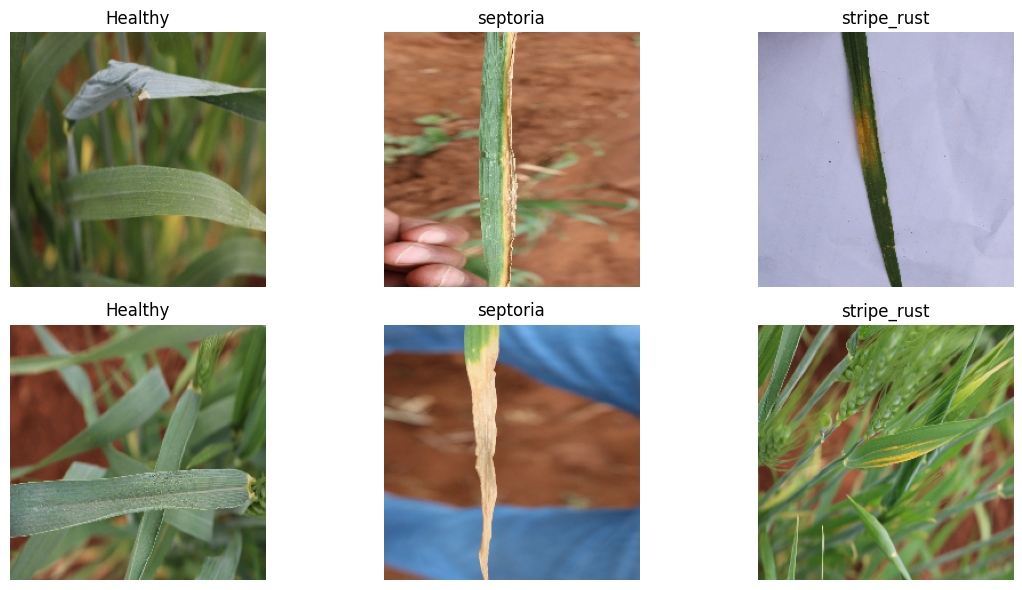

In [4]:
# random numbers
numbers = [10, 102, 222, 43, 137, 298]


# Create a figure and axes object with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot each image on a separate subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X[numbers[i]], dtype='uint8'))
    ax.set_title(list(class_dict.keys())[i%3])
    ax.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift by up to 10% of the image width
    height_shift_range=0.1, # Random vertical shift by up to 10% of the image height
    zoom_range=0.2,         # Random zoom by up to 20%
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'
)

In [6]:
new_X = np.empty((0, 224, 224, 3))
new_y = np.empty((0, ))
print("Applying data augmentation with each_class Target 600\n")
for each_class in class_dict:
    print("Applying data augmentation for : ", each_class)
    list_index = np.where(y == class_dict[each_class])
    list_imgs = X[list_index]
    print(f"No of Images available for {each_class} is {list_imgs.shape[0]}")
    target, available = 600, list_imgs.shape[0]
    imgs, req_batch = list_imgs, target - available
    print(f"No of Images required for {each_class} is {req_batch} \n")
    while req_batch > 0 :
        new_imgs = train_datagen.flow(list_imgs, batch_size=req_batch)
        tmp_imgs = new_imgs.next()
        req_batch = req_batch - available
        imgs = np.concatenate((np.array(imgs), np.array(tmp_imgs, dtype='uint8')))

    ys = np.zeros(600) + class_dict[each_class]
    new_X = np.concatenate((new_X, imgs))
    new_y = np.concatenate((new_y, ys))

Applying data augmentation with each_class Target 600

Applying data augmentation for :  Healthy
No of Images available for Healthy is 102
No of Images required for Healthy is 498 

Applying data augmentation for :  septoria
No of Images available for septoria is 97
No of Images required for septoria is 503 

Applying data augmentation for :  stripe_rust
No of Images available for stripe_rust is 208
No of Images required for stripe_rust is 392 



In [7]:
new_X, new_y = np.array(new_X), np.array(new_y)
unique_values, counts = np.unique(new_y, return_counts=True)
new_X.shape, unique_values, counts, (counts / len(new_y) * 100).round(2)

((1800, 224, 224, 3),
 array([0., 1., 2.]),
 array([600, 600, 600], dtype=int64),
 array([33.33, 33.33, 33.33]))

In [8]:
X_train, X_dummy, y_train, y_dummy = train_test_split(new_X, new_y, train_size=0.8, shuffle=True, random_state=123, stratify=new_y)
print(f'training',X_train.shape, X_dummy.shape, y_train.shape, y_dummy.shape)

X_val_, X_test_, y_val_, y_test_ = train_test_split(X_dummy, y_dummy, train_size=0.5, shuffle=True, random_state=123, stratify=y_dummy)
print(f'val - test',X_val_.shape, X_test_.shape, y_val_.shape, y_test_.shape)

training (1440, 224, 224, 3) (360, 224, 224, 3) (1440,) (360,)
val - test (180, 224, 224, 3) (180, 224, 224, 3) (180,) (180,)


In [9]:
X_train = X_train / 255
X_test_ = X_test_ / 255
X_val_ = X_val_ / 255

In [10]:
# y_train.value_counts()
unique_values, counts = np.unique(y_train, return_counts=True)
unique_values, counts, (counts / len(y_train) * 100).round(2)

(array([0., 1., 2.]),
 array([480, 480, 480], dtype=int64),
 array([33.33, 33.33, 33.33]))

In [11]:
# y_test.value_counts()
unique_values, counts = np.unique(y_test_, return_counts=True)
unique_values, counts, (counts / len(y_test_) * 100).round(2)

(array([0., 1., 2.]),
 array([60, 60, 60], dtype=int64),
 array([33.33, 33.33, 33.33]))

In [12]:
# y_val.value_counts()
unique_values, counts = np.unique(y_val_, return_counts=True)
unique_values, counts, (counts / len(y_val_) * 100).round(2)

(array([0., 1., 2.]),
 array([60, 60, 60], dtype=int64),
 array([33.33, 33.33, 33.33]))

In [13]:
# Convert labels to one-hot encoding
num_classes = 3
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_, num_classes)
y_val = tf.keras.utils.to_categorical(y_val_, num_classes)
y_train.shape, y_test.shape, y_val.shape

((1440, 3), (180, 3), (180, 3))

In [14]:
def create_custom_model(base_model, input_shape, num_classes):
    # Freeze the pretrained convolutional base
    base_model.trainable = False
    
    # Add custom classification layers on top of the base model
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    # Create the full model
    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model


In [15]:
# Define input shape and number of classes
input_shape = (224, 224, 3)  
num_classes = 3  

# Load the pretrained models with include_top=False
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

In [16]:
# Create custom models(0108) using each base model
mobilenet_0108_model = create_custom_model(mobilenet_base, input_shape, num_classes)

# Compile the model
mobilenet_0108_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
mobilenet_0108_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [18]:
mobilenet_model_history = mobilenet_0108_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val_, y_val))

Epoch 1/10
23/23 [==============================] - 27s 1s/step - loss: 0.5133 - accuracy: 0.7799 - val_loss: 0.2229 - val_accuracy: 0.9167
Epoch 2/10
23/23 [==============================] - 23s 1s/step - loss: 0.1357 - accuracy: 0.9465 - val_loss: 0.0833 - val_accuracy: 0.9611
Epoch 3/10
23/23 [==============================] - 23s 984ms/step - loss: 0.0744 - accuracy: 0.9757 - val_loss: 0.0577 - val_accuracy: 0.9778
Epoch 4/10
23/23 [==============================] - 24s 1s/step - loss: 0.0485 - accuracy: 0.9882 - val_loss: 0.0448 - val_accuracy: 0.9833
Epoch 5/10
23/23 [==============================] - 25s 1s/step - loss: 0.0409 - accuracy: 0.9889 - val_loss: 0.0411 - val_accuracy: 0.9833
Epoch 6/10
23/23 [==============================] - 24s 1s/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0311 - val_accuracy: 0.9889
Epoch 7/10
23/23 [==============================] - 25s 1s/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.0319 - val_accuracy: 0.9944
Epoch 8/10
23/23 

In [19]:
# Evaluate the model
mobilenet_test_loss, mobilenet_test_acc = mobilenet_0108_model.evaluate(X_test_, y_test)

print('Test loss:', mobilenet_test_loss)
print('Test accuracy:', mobilenet_test_acc)

6/6 [==============================] - 3s 489ms/step - loss: 0.0204 - accuracy: 0.9889
Test loss: 0.020422108471393585
Test accuracy: 0.9888888597488403


In [20]:
y_pred_ = mobilenet_0108_model.predict(X_test_)

# Reverse one-hot encoding
y_pred = np.argmax(y_pred_, axis=1)

# y_pred.value_counts()
unique_values, counts = np.unique(y_pred, return_counts=True)
unique_values, counts, (counts / len(y_pred) * 100).round(2)

6/6 [==============================] - 3s 466ms/step


(array([0, 1, 2], dtype=int64),
 array([62, 60, 58], dtype=int64),
 array([34.44, 33.33, 32.22]))

In [21]:
df = pd.DataFrame(mobilenet_model_history.history).reset_index(names='epoch')
df

,epoch,loss,accuracy,val_loss,val_accuracy
0,0,0.513348,0.779861,0.222852,0.916667
1,1,0.135721,0.946528,0.083294,0.961111
2,2,0.074353,0.975694,0.057703,0.977778
3,3,0.048525,0.988194,0.044812,0.983333
4,4,0.040885,0.988889,0.041122,0.983333
5,5,0.026186,0.992361,0.031087,0.988889
6,6,0.019179,0.994444,0.031907,0.994444
7,7,0.015270,0.997917,0.022840,0.994444
8,8,0.010856,0.997222,0.020153,0.994444
9,9,0.013383,0.996528,0.022914,0.994444


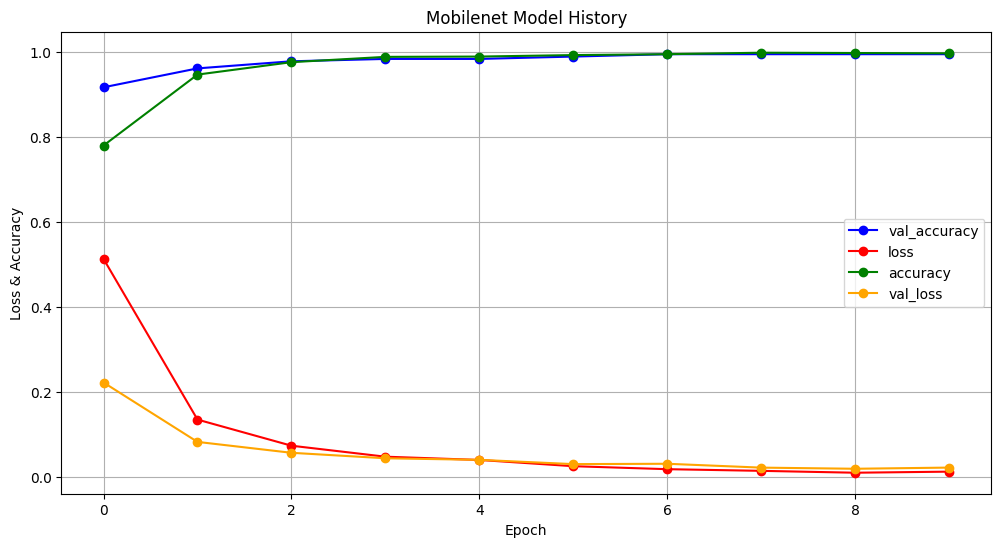

In [22]:

plt.subplots(figsize=(12, 6))

plt.plot(df['epoch'], df['val_accuracy'], label='val_accuracy', 
        marker='o', color='blue')
plt.plot(df['epoch'], df['loss'], label='loss', 
        marker='o', color='red')
plt.plot(df['epoch'], df['accuracy'], label='accuracy', 
        marker='o', color='green')
plt.plot(df['epoch'], df['val_loss'], label='val_loss', 
        marker='o', color='orange')

plt.title('Mobilenet Model History')
plt.xlabel('Epoch')
plt.ylabel('Loss & Accuracy')

plt.grid(True)
plt.legend()

plt.show()

In [23]:
y_test.shape, y_pred.shape

((180, 3), (180,))

In [24]:
# Compute the confusion matrix
cm = confusion_matrix(y_test_, y_pred)
cm

array([[60,  0,  0],
       [ 0, 60,  0],
       [ 2,  0, 58]], dtype=int64)

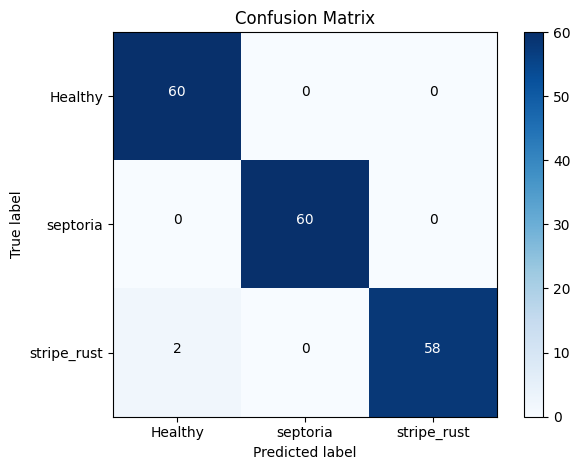

In [25]:
import itertools
# Define classes (if not already defined)
classes = np.unique(list(class_dict.keys()))

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Text annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()